## LEAD SCORING CASE STUDY

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Index:

1. [Step 1: Import important libraries](#1)

    - Read Leads data into dataframe
    - Quick review of dataframe
    - Shape of Leads dataframe
    - Check for conversion rate in dataframe

1. [Step 2: Analyze data and prepare data](#2)

    - Check for missing values
    - Drop unwanted columns
    - Fill NA for null values
    
1. [Step 3: Model Building](#3)

    - Relating all the categorical variables to Converted
    - Univariate Analysis
    - Bivariate Analysis: Categorical variables
    - Checking correlation
    - Outlier Analysis
    - Create dummy variables

1. [Step 4: Data Preparation for Modeling](#4)

    - Train Test split
    - Feature Scaling

1. [Step 5: Model Building](#5)

   - Create a function for model building
   - Assessing the model with StatsModels
   - Prediction
   - Create confusion metrics
   - Metrics beyond simply accuracy
   - Plotting the ROC Curve
   - Finding Optimal Cutoff Point
   - Plot accuracy sensitivity and specificity
   - Observation (Train Data)
   - Precision and Recall
   - Precision and recall tradeoff
   - Making predictions on the test set
   - Observation (Test Data)
 
1. [Step 6: Final Observation](#6)

<a id="1"></a> <br>
### Import Important libraries

In [1]:
# Import Important Libraries
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Read Data¶
Read Leads data into dataframe

In [2]:
Leads_df=pd.read_csv(r'C:\Users\Jaikrish\Documents\Python Scripts\Machine Learning - I\Lead Scoring Assignment\Leads.csv')
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Quick review of dataframe

In [3]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Shape of Leads dataframe

In [4]:
Leads_df.shape

(9240, 37)

#### Check for conversion rate in dataframe

In [5]:
# Conversion rate

round(Leads_df["Converted"].sum()/len(Leads_df.index),2)

0.39

Conversion rate is 38 percent

In [6]:
Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
Leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
Leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<a id="2"></a> <br>
### Analyze data and prepare data
Check for missing values

In [9]:
# The percentage of missing values
round((Leads_df.isna().sum()*100)/Leads_df.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Number of columns having null value more than 30%= 6


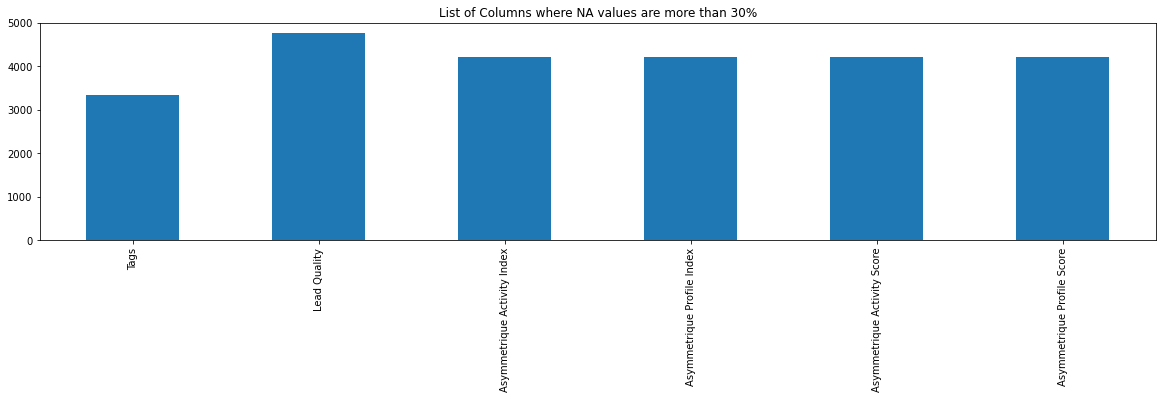

In [10]:
Null_col = Leads_df.isnull().sum()
Null_col = Null_col[Null_col.values >(0.3*len(Leads_df))]
print('Number of columns having null value more than 30%=',len(Null_col))
plt.figure(figsize=(20,4))
Null_col.plot(kind='bar')
plt.title('List of Columns where NA values are more than 30%')
plt.show()

#### Inference:
- There are lots of column that contains Null value, even some important column contains Null value so its better to fill them nan value rather than drop them, rest we can remove

Dropping unwanted columns

In [11]:

Leads_df= Leads_df.drop(['Prospect ID','Magazine','I agree to pay the amount through cheque','Lead Quality',
                           'Update me on Supply Chain Content','Asymmetrique Profile Index','Asymmetrique Activity Index',
                           'Asymmetrique Profile Score','Asymmetrique Activity Score','How did you hear about X Education','Receive More Updates About Our Courses','Get updates on DM Content'],axis=1)


In [12]:
Leads_df.shape

(9240, 25)

In [13]:
# The percentage of missing values
round((Leads_df.isna().sum()*100)/Leads_df.shape[0], 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
Leads_df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [15]:
Leads_df.City.describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [16]:
Leads_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [17]:
Leads_df['Lead Profile'].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

In [18]:
Leads_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Filling NA for null values

In [19]:
Leads_df['Country']=Leads_df.Country.fillna('India')

In [20]:
Leads_df['City']=Leads_df.City.fillna('Mumbai')

In [21]:
Leads_df['Specialization'] = Leads_df['Specialization'].fillna('Not known')

In [22]:
Leads_df['What is your current occupation']=Leads_df['What is your current occupation'].fillna('Not Known')

In [23]:
Leads_df['What matters most to you in choosing a course']=Leads_df['What matters most to you in choosing a course'].fillna('Not Known')

In [24]:
Leads_df['Tags'] = Leads_df['Tags'].fillna('Will revert after reading the email')

In [25]:
Leads_df['Lead Profile']=Leads_df['Lead Profile'].fillna('Select')

In [26]:
round((Leads_df.isna().sum()*100)/Leads_df.shape[0], 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

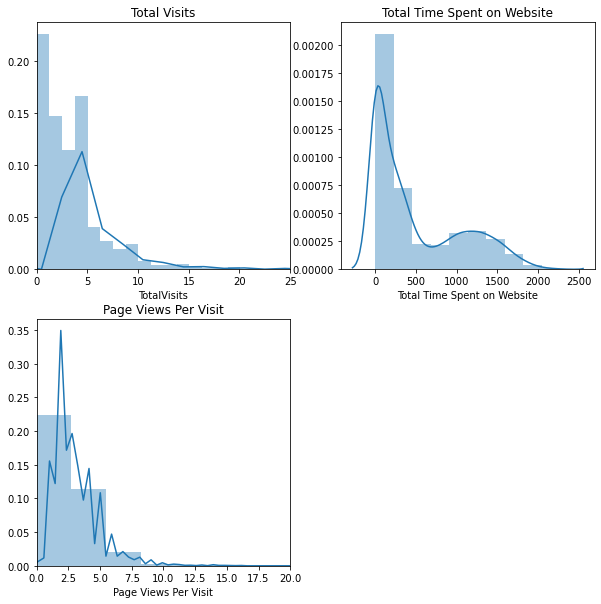

In [27]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.distplot(Leads_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.distplot(Leads_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.distplot(Leads_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )


### Exploratory Data Analytics

#### Relating all the categorical variables to Converted¶


Univariate Analysis

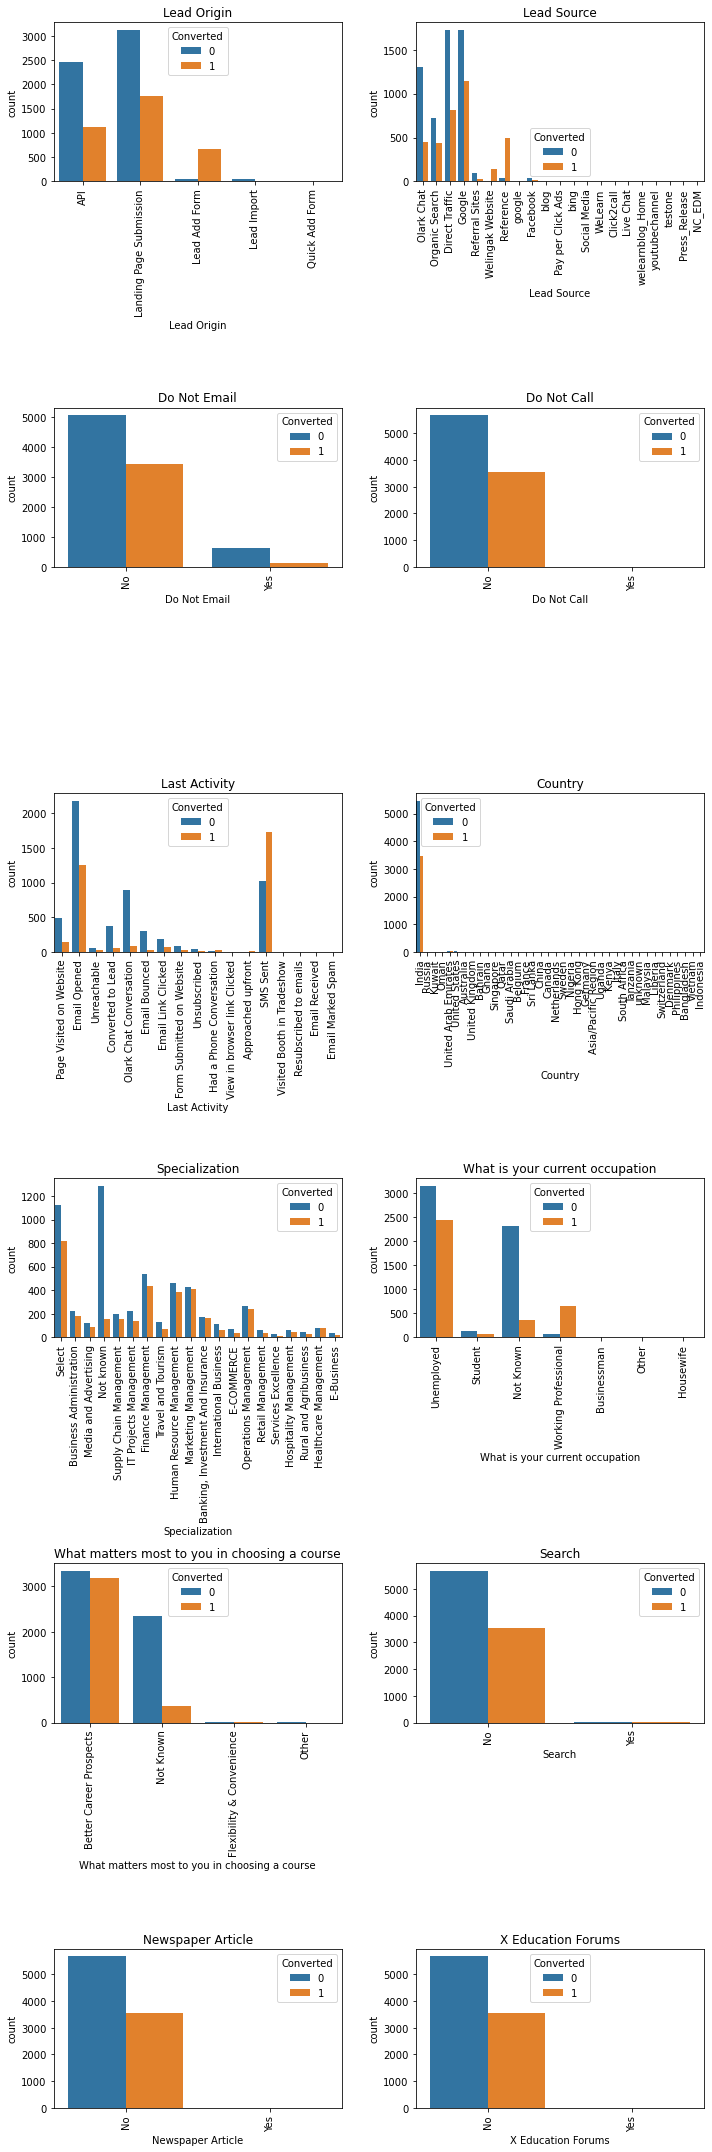

In [28]:
plt.figure(figsize = (10,30))


plt.subplot(6,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(x='Last Activity', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(6,2,6)
sns.countplot(x='Country', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(6,2,7)
sns.countplot(x='Specialization', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(6,2,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')


plt.subplot(6,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(6,2,10)
sns.countplot(x='Search', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Search')


plt.subplot(6,2,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(6,2,12)
sns.countplot(x='X Education Forums', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.tight_layout()
plt.show()

#### Bivariate Analysis: Categorical variables

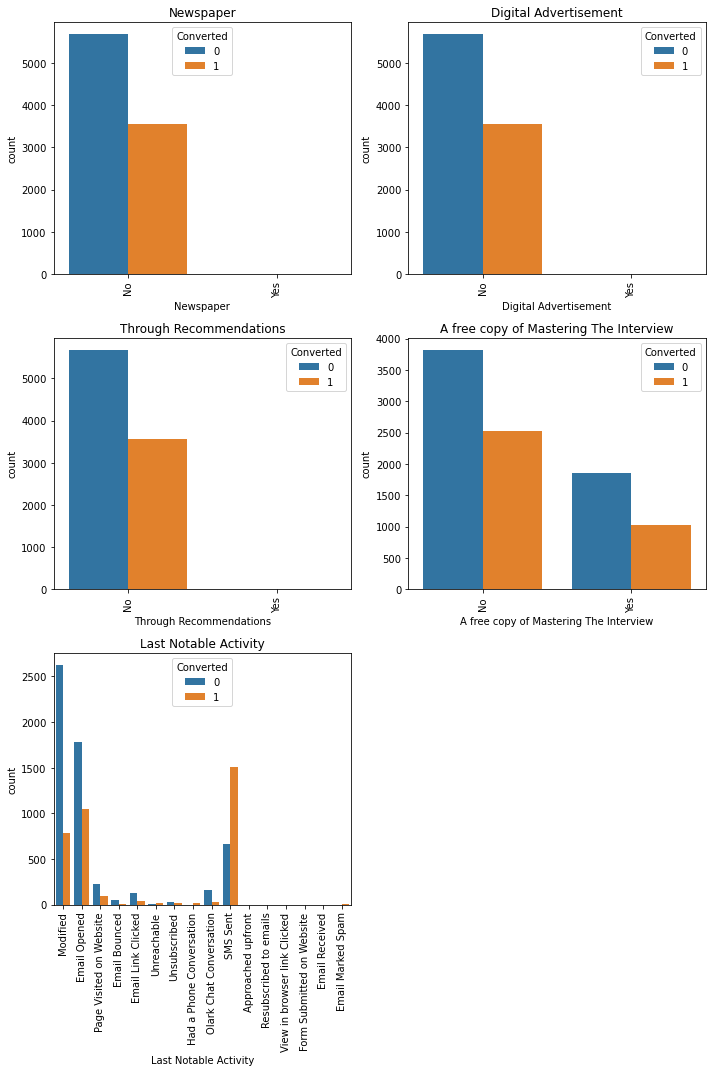

In [29]:
plt.figure(figsize = (10,15))


plt.subplot(3,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(3,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')


plt.subplot(3,2,3)
sns.countplot(x='Through Recommendations', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(3,2,4)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')


plt.subplot(3,2,5)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.tight_layout()
plt.show()


#### Checking correlation

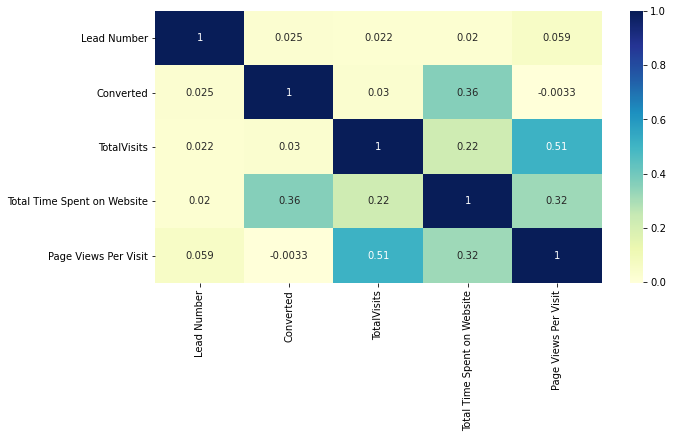

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(Leads_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Outlier Analysis

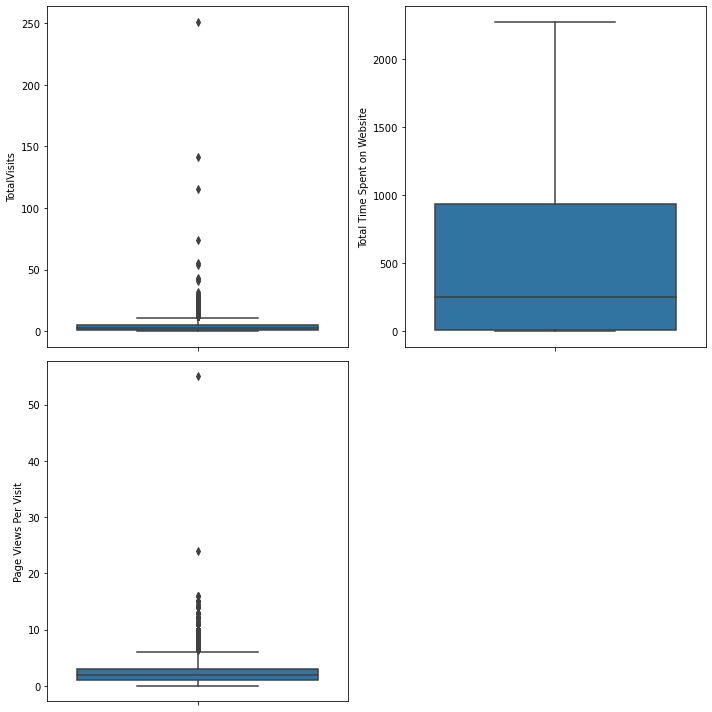

In [31]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.boxplot(y=Leads_df['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(y=Leads_df['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(y=Leads_df['Page Views Per Visit'])

plt.tight_layout()
plt.show()

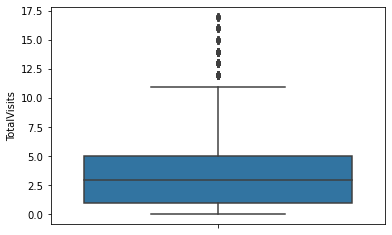

In [32]:
## Removing outliers 

Q3 = Leads_df.TotalVisits.quantile(0.99)
Leads_df = Leads_df[(Leads_df.TotalVisits <= Q3)]
Q1 = Leads_df.TotalVisits.quantile(0.01)
Leads_df = Leads_df[(Leads_df.TotalVisits >= Q1)]
sns.boxplot(y=Leads_df['TotalVisits'])
plt.show()

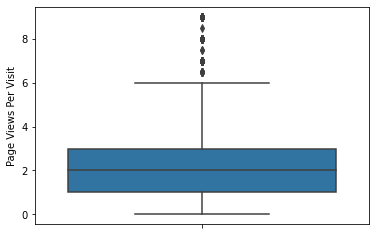

In [33]:
Q3 = Leads_df['Page Views Per Visit'].quantile(0.99)
Leads_df = Leads_df[(Leads_df['Page Views Per Visit'] <= Q3)]
Q1 = Leads_df['Page Views Per Visit'].quantile(0.01)
Leads_df = Leads_df[(Leads_df['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=Leads_df['Page Views Per Visit'])
plt.show()

### Create dummy variables

For categorical variables with multiple levels, create dummy features (one-hot encoded)¶

In [34]:
#list of columns to be dropped
Dropped_col=['Country','Tags','Lead Number','Lead Profile']

In [35]:
Leads_df=Leads_df.drop(Dropped_col,1)
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8953 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Do Not Email                                   8953 non-null   object 
 3   Do Not Call                                    8953 non-null   object 
 4   Converted                                      8953 non-null   int64  
 5   TotalVisits                                    8953 non-null   float64
 6   Total Time Spent on Website                    8953 non-null   int64  
 7   Page Views Per Visit                           8953 non-null   float64
 8   Last Activity                                  8953 non-null   object 
 9   Specialization                                 8953 

In [36]:
# Identifying Categorical Variables/Columns
Categorical_Col= Leads_df.select_dtypes(include=['object']).columns
Categorical_Col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
dummy = pd.get_dummies(Leads_df[['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Dummy_Lead_df = pd.concat([Leads_df, dummy], axis=1)
Dummy_Lead_df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing 

In [38]:
Dummy_Lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

In [39]:
Dummy_Lead_df = Dummy_Lead_df.drop(['City','What is your current occupation_Not Known','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_Not known','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Dummy_Lead_df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

<a id="3"></a> <br>
### Data Preparation for Modeling

#### Test-Train Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = Dummy_Lead_df.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
# Putting the target variable in y
y = Dummy_Lead_df['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
### Checking the Conversion Rate
Converted_Rate = (sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100
Converted_Rate

37.92025019546521

#### Feature Scaling

In [45]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9196,0.294118,0.655810,0.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4696,0.176471,0.201144,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3274,0.235294,0.055458,0.222222,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2164,0.117647,0.172975,0.222222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1667,0.235294,0.513644,0.147778,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<a id="4"></a> <br>
### Model Building

#### Create a function for model building

In [46]:
logreg = LogisticRegression()

In [47]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
       False])

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 58),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 29),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 63),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_blog', False, 52),
 ('Lead Source_google', False, 38),
 ('Lead Source_testone', False, 33),
 ('Lead Source_welearnblog_Home', False, 53),
 ('

In [50]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [51]:
# Selecting columns selected by RFE
X_train = X_train[col]

__Assessing the model with StatsModels__

In [52]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.2
Date:                Mon, 08 Feb 2021   Deviance:                       5304.4
Time:                        12:34:10   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2200      0.077     -2.875      0.004      -0.370      -0.070
Total Time Spent on Website                              3.8271      0.146     26.269      0.000       3.542       4.113
Lead Origin_Lead Add Form                                3.7484      0.242     15.470      0.000       3.274       4.223
Lead Source_Direct Traffic                              -0.5876      0.078     -7.505      0.000      -0.741      -0.434
Lead Source_Referral Sites                              -0.6144      0.323     -1.903      0.057      -1.247       0.018
Lead Source_Welingak Website                             2.3179      1.039      2.231      0.026       0.281       4.354
Do Not Email_Yes                                        -1.7076      0.175     -9.778      0.000      -2.050      -1.365
Last Activity_Had a Phone Conversation                   2.5371      0.927      2.736      0.006       0.720       4.355
Last Activity_Olark Chat Conversation                   -0.9441      0.191     -4.951      0.000      -1.318      -0.570
What is your current occupation_Housewife               22.7371   1.85e+04      0.001      0.999   -3.63e+04    3.64e+04
What is your current occupation_Working Professional     2.6504      0.195     13.623      0.000       2.269       3.032
Last Notable Activity_Email Link Clicked                -1.8257      0.271     -6.734      0.000      -2.357      -1.294
Last Notable Activity_Email Opened                      -1.4116      0.087    -16.172      0.000      -1.583      -1.240
Last Notable Activity_Modified                          -1.8864      0.095    -19.783      0.000      -2.073      -1.700
Last Notable Activity_Olark Chat Conversation           -2.0529      0.417     -4.923      0.000      -2.870      -1.236
Last Notable Activity_Page Visited on Website           -1.7579      0.211     -8.334      0.000      -2.171      -1.344
========================================================================================================================
"""

In [53]:
# Finding 'variance_inflation_factor'

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.75
7,Last Activity_Olark Chat Conversation,1.70
0,Total Time Spent on Website,1.54
1,Lead Origin_Lead Add Form,1.46
2,Lead Source_Direct Traffic,1.43
13,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.32
11,Last Notable Activity_Email Opened,1.31
9,What is your current occupation_Working Professional,1.16
5,Do Not Email_Yes,1.12


__The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife'.__

In [54]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [55]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.9
Date:                Mon, 08 Feb 2021   Deviance:                       5311.7
Time:                        12:34:11   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2188      0.077     -2.860      0.004      -0.369      -0.069
Total Time Spent on Website                              3.8263      0.146     26.278      0.000       3.541       4.112
Lead Origin_Lead Add Form                                3.7587      0.242     15.527      0.000       3.284       4.233
Lead Source_Direct Traffic                              -0.5907      0.078     -7.546      0.000      -0.744      -0.437
Lead Source_Referral Sites                              -0.6176      0.323     -1.913      0.056      -1.250       0.015
Lead Source_Welingak Website                             2.3040      1.039      2.218      0.027       0.268       4.340
Do Not Email_Yes                                        -1.7091      0.175     -9.786      0.000      -2.051      -1.367
Last Activity_Had a Phone Conversation                   2.5346      0.927      2.734      0.006       0.717       4.352
Last Activity_Olark Chat Conversation                   -0.9486      0.191     -4.975      0.000      -1.322      -0.575
What is your current occupation_Working Professional     2.6479      0.195     13.610      0.000       2.267       3.029
Last Notable Activity_Email Link Clicked                -1.8263      0.271     -6.734      0.000      -2.358      -1.295
Last Notable Activity_Email Opened                      -1.4078      0.087    -16.136      0.000      -1.579      -1.237
Last Notable Activity_Modified                          -1.8827      0.095    -19.758      0.000      -2.070      -1.696
Last Notable Activity_Olark Chat Conversation           -2.0492      0.417     -4.915      0.000      -2.866      -1.232
Last Notable Activity_Page Visited on Website           -1.7575      0.211     -8.332      0.000      -2.171      -1.344
========================================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.74
7,Last Activity_Olark Chat Conversation,1.70
0,Total Time Spent on Website,1.54
1,Lead Origin_Lead Add Form,1.45
2,Lead Source_Direct Traffic,1.43
12,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.32
10,Last Notable Activity_Email Opened,1.30
8,What is your current occupation_Working Professional,1.16
5,Do Not Email_Yes,1.12


In [57]:
X_train.drop(['Lead Source_Referral Sites'], axis = 1, inplace = True)

In [58]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.8
Date:                Mon, 08 Feb 2021   Deviance:                       5315.7
Time:                        12:34:11   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2253      0.076     -2.948      0.003      -0.375      -0.076
Total Time Spent on Website                              3.8229      0.146     26.262      0.000       3.538       4.108
Lead Origin_Lead Add Form                                3.7699      0.242     15.575      0.000       3.296       4.244
Lead Source_Direct Traffic                              -0.5789      0.078     -7.416      0.000      -0.732      -0.426
Lead Source_Welingak Website                             2.3040      1.039      2.217      0.027       0.268       4.340
Do Not Email_Yes                                        -1.7131      0.175     -9.801      0.000      -2.056      -1.371
Last Activity_Had a Phone Conversation                   2.5117      0.934      2.690      0.007       0.682       4.342
Last Activity_Olark Chat Conversation                   -0.9508      0.191     -4.988      0.000      -1.324      -0.577
What is your current occupation_Working Professional     2.6486      0.195     13.610      0.000       2.267       3.030
Last Notable Activity_Email Link Clicked                -1.8333      0.271     -6.767      0.000      -2.364      -1.302
Last Notable Activity_Email Opened                      -1.4120      0.087    -16.193      0.000      -1.583      -1.241
Last Notable Activity_Modified                          -1.8882      0.095    -19.827      0.000      -2.075      -1.702
Last Notable Activity_Olark Chat Conversation           -2.0491      0.417     -4.916      0.000      -2.866      -1.232
Last Notable Activity_Page Visited on Website           -1.7823      0.211     -8.453      0.000      -2.196      -1.369
========================================================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.73
6,Last Activity_Olark Chat Conversation,1.70
0,Total Time Spent on Website,1.54
1,Lead Origin_Lead Add Form,1.45
2,Lead Source_Direct Traffic,1.42
11,Last Notable Activity_Olark Chat Conversation,1.33
3,Lead Source_Welingak Website,1.32
9,Last Notable Activity_Email Opened,1.30
7,What is your current occupation_Working Professional,1.16
4,Do Not Email_Yes,1.12


__All the VIF values are good and all the p-values are below 0.05. So we can fix model__

### Prediction

In [60]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

In [61]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)


In [62]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Convert,Convert_Prob
0,1,0.907355
1,0,0.491194
2,0,0.496671
3,0,0.082936
4,1,0.580861


In [63]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Predicted
0,1,0.907355,1
1,0,0.491194,0
2,0,0.496671,0
3,0,0.082936,0
4,1,0.580861,1


#### Create confusion metrics

In [64]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3435  447]
 [ 832 1553]]


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.7959151108983564


### Metrics beyond simply accuracy

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6511530398322851

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.884853168469861

In [69]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.1151468315301391


In [70]:
# positive predictive value 
print (TP / float(TP+FP))

0.7765


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8050152331849074


__we have around 80% accuracy, sensitivity of around 65% and specificity of around 88%.__

### Plotting the ROC Curve(Optimise cut off)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [72]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

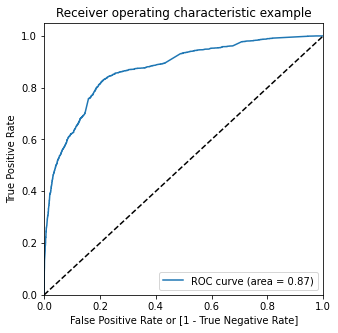

In [74]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.


### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [75]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.907355,1,1,1,1,1,1,1,1,1,1,1
1,0,0.491194,0,1,1,1,1,1,0,0,0,0,0
2,0,0.496671,0,1,1,1,1,1,0,0,0,0,0
3,0,0.082936,0,1,0,0,0,0,0,0,0,0,0
4,1,0.580861,1,1,1,1,1,1,1,0,0,0,0


In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.541727  0.980294  0.272282
0.2   0.2  0.745652  0.874633  0.666409
0.3   0.3  0.798628  0.841509  0.772282
0.4   0.4  0.806606  0.776939  0.824833
0.5   0.5  0.795915  0.651153  0.884853
0.6   0.6  0.792245  0.568973  0.929418
0.7   0.7  0.783469  0.500210  0.957496
0.8   0.8  0.764002  0.422222  0.973982
0.9   0.9  0.713260  0.259958  0.991757


#### Plot accuracy sensitivity and specificity

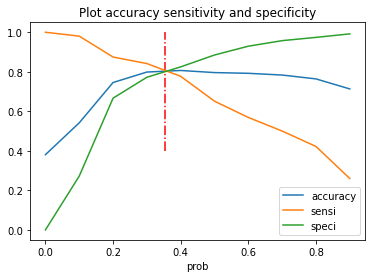

In [77]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.355, ymax=1, ymin=0.4, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.907355,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.491194,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.496671,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.082936,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.580861,1,1,1,1,1,1,1,0,0,0,0,1


In [79]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8061273336524652

In [80]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3109,  773],
       [ 442, 1943]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8146750524109014

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.8008758371973209

### Observation:¶
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is very good. We have the following values for the Train Data:

- Accuracy : 80.61%
- Sensitivity : 81.47%
- Specificity : 80.08%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [84]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.19912416280267903


In [85]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7153902798232695


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8755280202759786


### Precision and Recall

In [87]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
confusion

array([[3435,  447],
       [ 832, 1553]], dtype=int64)

In [88]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7765

In [89]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6511530398322851

In [90]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.7765

In [91]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.6511530398322851

### Precision and recall tradeoff

In [92]:
y_train_pred_final.Convert, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Convert, Length: 6267, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    0
 6263    0
 6264    0
 6265    0
 6266    1
 Name: Predicted, Length: 6267, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

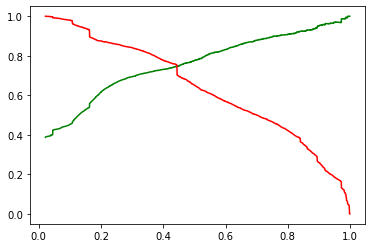

In [94]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [95]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
col = X_train.columns

In [97]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7681,1.0,0.136884,0,1,0,0,0,0,0,0,0,0,0,0
984,1.0,0.080546,0,0,0,0,0,0,0,0,0,1,0,0
8135,1.0,0.401849,0,1,0,1,0,0,0,0,0,0,0,0
6915,1.0,0.062060,0,0,0,0,0,0,0,0,1,0,0,0
2712,1.0,0.110915,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,1.0,0.000000,0,0,0,0,0,1,0,0,0,1,0,0
1420,1.0,0.174736,0,0,0,0,0,1,0,0,0,0,1,0
5996,1.0,0.136884,0,1,0,0,0,0,0,0,0,1,0,0
4143,1.0,0.036092,0,0,0,0,0,0,0,0,0,1,0,0


In [98]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Convert_Prob'})
y_pred_final.head()

,Converted,Convert_Prob
0,0,0.430237
1,0,0.141168
2,0,0.272679
3,0,0.197810
4,1,0.229123


In [99]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Convert_Prob,final_predicted
0,0,0.430237,1
1,0,0.141168,0
2,0,0.272679,0
3,0,0.197810,0
4,1,0.229123,0
...,...,...,...
2681,1,0.044601,0
2682,0,0.071943,0
2683,1,0.102559,0
2684,0,0.121792,0


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8015636634400596

In [101]:

# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1334,  342],
       [ 191,  819]], dtype=int64)

In [102]:

# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.810891089108911

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.7959427207637232

### Observation:¶
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 80.15%
- Sensitivity : 81.08%
- Specificity : 79.59%


<a id="5"></a> <br>
### Final Observation:¶

Let us compare the values obtained for Train & Test:

Train Data: 
- Accuracy : 80.61%
- Sensitivity : 81.47%
- Specificity : 80.08%

Test Data: 
- Accuracy : 80.15%
- Sensitivity : 81.08%
- Specificity : 79.59%

__The Model seems to predict the Conversion Rate very well.__

__As per CEO, the target lead conversion rate to be around 80% and we should be able to give the CEO confidence in making good calls based on this model__